In [1]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,GridSearchCV
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Regression Analysis

## Introduction

This notebook provides an exploration of regression analysis applied to the Chicago Taxi Trip Data dataset, which contains detailed information about taxi trips taken in Chicago, including timestamps, locations, trip duration, payment methods, and more.

The dataset can be useful for regression analysis. Here’s how it can be applied and what insights might be gained:
1. Fare Prediction: Predict the fare amount for a trip based on various features
2. Trip Duration Estimation:Estimate the duration of a taxi trip based on its distance, pickup and drop-off locations, and time of day.
3. Demand Forecasting:Forecast future taxi trip demand for different areas or times of day to assist with operational planning and resource allocation.


The objectives of this regression analysis task are to:
- **[Data Cleaning](#handling-missing-values)**: Handle missing data in the dataset..
- [**Feature Engineering**](#encoding): Derive additional features from existing data to enhance model performance.
- [**Data Visualizations**](#visualizations): Data Visualizations.
- [**Regression Analysis**](#regression-analysis): Apply regression models to predict outcomes.


In [3]:
taxi_df = pd.read_csv('/Users/joycendichu/github-workflows/chicago_data_records.csv')

In [4]:
taxi_df.columns

Index(['dropoff_community_area', 'tolls', 'payment_type',
       'trip_start_timestamp', 'fare', 'dropoff_centroid_location',
       'pickup_census_tract', 'trip_miles', 'trip_id',
       'pickup_centroid_location', 'trip_end_timestamp',
       'pickup_centroid_latitude', 'pickup_community_area',
       'dropoff_centroid_latitude', 'dropoff_centroid_longitude', 'taxi_id',
       'dropoff_census_tract', 'tips', 'extras', 'pickup_centroid_longitude',
       'trip_seconds', 'company', 'trip_total'],
      dtype='object')

## <a name="handling-missing-values"></a>1. Data cleaning

### Overview
Missing values can skew analysis and predictions. We’ll start by calculating both the sum and percentage of missing values per feature to understand their extent and impact


In [6]:
null_columns = [taxi_df[column].isnull().value_counts()  for column in taxi_df.columns ]

In [7]:
taxi_df.head(7)

,dropoff_community_area,tolls,payment_type,trip_start_timestamp,fare,dropoff_centroid_location,pickup_census_tract,trip_miles,trip_id,pickup_centroid_location,...,dropoff_centroid_latitude,dropoff_centroid_longitude,taxi_id,dropoff_census_tract,tips,extras,pickup_centroid_longitude,trip_seconds,company,trip_total
0,2.0,0.0,Credit Card,2024-07-01T00:00:00.000,32.25,"{'type': 'Point', 'coordinates': [-87.69501258...",NaN,12.75,cf9de83b9b896775b39228ac63531321ff9cdd99,"{'type': 'Point', 'coordinates': [-87.91362459...",...,42.001571,-87.695013,062551a6a256e259d266eb4904910a6d2fe1b649bc7144...,NaN,0.00,4.0,-87.913625,1324.0,Sun Taxi,36.75
1,32.0,0.0,Cash,2024-07-01T00:00:00.000,3.25,"{'type': 'Point', 'coordinates': [-87.62519214...",NaN,0.00,8741d7db30038c021ef399f66fcae073353cf4b5,"{'type': 'Point', 'coordinates': [-87.62519214...",...,41.878866,-87.625192,e64ae81fa38a2e8716a35dfa4e316dddd2eda286f5824e...,NaN,0.00,0.0,-87.625192,25.0,Sun Taxi,3.25
2,NaN,0.0,Credit Card,2024-07-01T00:00:00.000,27.25,NaN,NaN,10.20,b3a45ff5843a0b06fcea016a449a67c83390cb85,"{'type': 'Point', 'coordinates': [-87.76961545...",...,NaN,NaN,1b7aef0344f45914e7942efad05553934fe222c880a1cb...,NaN,6.79,17.5,-87.769615,1209.0,Globe Taxi,52.04
3,NaN,0.0,Cash,2024-07-01T00:00:00.000,71.00,NaN,1.703198e+10,29.92,84982157bd34baa10a64d70ba7427de06a871959,"{'type': 'Point', 'coordinates': [-87.90303966...",...,NaN,NaN,8c513c0061e8e616e7d6f25d5fd1bbd0d5bfd90fabe8b6...,NaN,0.00,6.5,-87.903040,2283.0,Flash Cab,77.50
4,6.0,0.0,Mobile,2024-07-01T00:00:00.000,40.50,"{'type': 'Point', 'coordinates': [-87.65599818...",NaN,15.17,a36208a5e4c279d339aba68c44d29fdb5869e420,"{'type': 'Point', 'coordinates': [-87.91362459...",...,41.944227,-87.655998,8e08799f421f71f00bb9ded6011b7e5369296773e81ad0...,NaN,9.40,6.0,-87.913625,2143.0,Taxicab Insurance Agency Llc,56.40
5,40.0,0.0,Prcard,2024-07-01T00:00:00.000,23.50,"{'type': 'Point', 'coordinates': [-87.61793138...",NaN,8.98,12eb864c40504d0ec23688f859c901c7ebfef9c4,"{'type': 'Point', 'coordinates': [-87.66905440...",...,41.792357,-87.617931,c60633c5d2053dd1c2076286b88196cf83f4fe0ecc1945...,NaN,0.00,0.0,-87.669054,551.0,Chicago Independents,23.50
6,32.0,0.0,Credit Card,2024-07-01T00:00:00.000,50.00,"{'type': 'Point', 'coordinates': [-87.62099291...",1.703132e+10,1.32,14053a120ecbfd21acfbb955d180108ba55679ad,"{'type': 'Point', 'coordinates': [-87.62217293...",...,41.884987,-87.620993,f531c46139ca165aca678e0c76a0bb0cce3443d5afbd7e...,1.703132e+10,10.10,0.0,-87.622173,345.0,Sun Taxi,60.60


In [8]:
null_columns = [taxi_df[column].isnull().value_counts()  for column in taxi_df.columns ]

In [9]:
taxi_df.isna().sum()

dropoff_community_area        1253
tolls                           45
payment_type                     0
trip_start_timestamp             0
fare                            45
dropoff_centroid_location     1194
pickup_census_tract           8096
trip_miles                       0
trip_id                          0
pickup_centroid_location       300
trip_end_timestamp               0
pickup_centroid_latitude       300
pickup_community_area          302
dropoff_centroid_latitude     1194
dropoff_centroid_longitude    1194
taxi_id                          0
dropoff_census_tract          8264
tips                            45
extras                          45
pickup_centroid_longitude      300
trip_seconds                     1
company                          0
trip_total                      45
dtype: int64

In [10]:
missing_percentages = taxi_df.isna().mean() * 100
print(missing_percentages)

dropoff_community_area        10.441667
tolls                          0.375000
payment_type                   0.000000
trip_start_timestamp           0.000000
fare                           0.375000
dropoff_centroid_location      9.950000
pickup_census_tract           67.466667
trip_miles                     0.000000
trip_id                        0.000000
pickup_centroid_location       2.500000
trip_end_timestamp             0.000000
pickup_centroid_latitude       2.500000
pickup_community_area          2.516667
dropoff_centroid_latitude      9.950000
dropoff_centroid_longitude     9.950000
taxi_id                        0.000000
dropoff_census_tract          68.866667
tips                           0.375000
extras                         0.375000
pickup_centroid_longitude      2.500000
trip_seconds                   0.008333
company                        0.000000
trip_total                     0.375000
dtype: float64


From the above output, we can identify features with high, medium, and low percentages of missing values. This classification will guide us in choosing the most appropriate method for handling the missing data

### 1.Group-Based Mode Imputation

Objective: Handle missing values by imputing with the mode of each group.

Method: Use mode imputation within groups defined by a specific column.

Grouping Column: trip_miles is used as the basis for grouping.

Implementation: The function computes the mode within each group and uses it to fill in missing values for the specified columns.

In [13]:
def fill_missing_with_group_mode(df, group_col, fill_cols):
    for col in fill_cols:
        group_modes = df.groupby(group_col)[col].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
        df[col] = df[col].fillna(group_modes)

fill_missing_with_group_mode(taxi_df, 'trip_miles', ['pickup_centroid_latitude', 'pickup_community_area', 'dropoff_centroid_latitude', 'dropoff_centroid_longitude','fare', 'tolls', 'tips', 'extras', 'trip_total'])


In [14]:
missing_percentages = taxi_df.isna().mean() * 100
print(missing_percentages)

dropoff_community_area        10.441667
tolls                          0.000000
payment_type                   0.000000
trip_start_timestamp           0.000000
fare                           0.000000
dropoff_centroid_location      9.950000
pickup_census_tract           67.466667
trip_miles                     0.000000
trip_id                        0.000000
pickup_centroid_location       2.500000
trip_end_timestamp             0.000000
pickup_centroid_latitude       0.166667
pickup_community_area          0.166667
dropoff_centroid_latitude      1.591667
dropoff_centroid_longitude     1.591667
taxi_id                        0.000000
dropoff_census_tract          68.866667
tips                           0.000000
extras                         0.000000
pickup_centroid_longitude      2.500000
trip_seconds                   0.008333
company                        0.000000
trip_total                     0.000000
dtype: float64


In [15]:
taxi_df.isna().sum()

dropoff_community_area        1253
tolls                            0
payment_type                     0
trip_start_timestamp             0
fare                             0
dropoff_centroid_location     1194
pickup_census_tract           8096
trip_miles                       0
trip_id                          0
pickup_centroid_location       300
trip_end_timestamp               0
pickup_centroid_latitude        20
pickup_community_area           20
dropoff_centroid_latitude      191
dropoff_centroid_longitude     191
taxi_id                          0
dropoff_census_tract          8264
tips                             0
extras                           0
pickup_centroid_longitude      300
trip_seconds                     1
company                          0
trip_total                       0
dtype: int64

### 2. Creating Missing Value Indicators
To handle features with significant amounts of missing data, new binary columns were created to explicitly indicate the presence of missing values.

Identify Missing Values: For each specified column, a new column is created to flag missing values (True if the original value is missing, False otherwise).

Implementation: New columns are named by appending _missing to the original column names.

In [17]:
def create_new_columns(taxi_df,columns):
    for column in columns:
        taxi_df[column + '_missing'] = taxi_df[column].isna()
create_new_columns(taxi_df, ['pickup_census_tract','dropoff_census_tract'])  

In [18]:
taxi_df.isna().sum()

dropoff_community_area          1253
tolls                              0
payment_type                       0
trip_start_timestamp               0
fare                               0
dropoff_centroid_location       1194
pickup_census_tract             8096
trip_miles                         0
trip_id                            0
pickup_centroid_location         300
trip_end_timestamp                 0
pickup_centroid_latitude          20
pickup_community_area             20
dropoff_centroid_latitude        191
dropoff_centroid_longitude       191
taxi_id                            0
dropoff_census_tract            8264
tips                               0
extras                             0
pickup_centroid_longitude        300
trip_seconds                       1
company                            0
trip_total                         0
pickup_census_tract_missing        0
dropoff_census_tract_missing       0
dtype: int64

In [19]:
taxi_df.head(10)

,dropoff_community_area,tolls,payment_type,trip_start_timestamp,fare,dropoff_centroid_location,pickup_census_tract,trip_miles,trip_id,pickup_centroid_location,...,taxi_id,dropoff_census_tract,tips,extras,pickup_centroid_longitude,trip_seconds,company,trip_total,pickup_census_tract_missing,dropoff_census_tract_missing
0,2.0,0.0,Credit Card,2024-07-01T00:00:00.000,32.25,"{'type': 'Point', 'coordinates': [-87.69501258...",NaN,12.75,cf9de83b9b896775b39228ac63531321ff9cdd99,"{'type': 'Point', 'coordinates': [-87.91362459...",...,062551a6a256e259d266eb4904910a6d2fe1b649bc7144...,NaN,0.00,4.0,-87.913625,1324.0,Sun Taxi,36.75,True,True
1,32.0,0.0,Cash,2024-07-01T00:00:00.000,3.25,"{'type': 'Point', 'coordinates': [-87.62519214...",NaN,0.00,8741d7db30038c021ef399f66fcae073353cf4b5,"{'type': 'Point', 'coordinates': [-87.62519214...",...,e64ae81fa38a2e8716a35dfa4e316dddd2eda286f5824e...,NaN,0.00,0.0,-87.625192,25.0,Sun Taxi,3.25,True,True
2,NaN,0.0,Credit Card,2024-07-01T00:00:00.000,27.25,NaN,NaN,10.20,b3a45ff5843a0b06fcea016a449a67c83390cb85,"{'type': 'Point', 'coordinates': [-87.76961545...",...,1b7aef0344f45914e7942efad05553934fe222c880a1cb...,NaN,6.79,17.5,-87.769615,1209.0,Globe Taxi,52.04,True,True
3,NaN,0.0,Cash,2024-07-01T00:00:00.000,71.00,NaN,1.703198e+10,29.92,84982157bd34baa10a64d70ba7427de06a871959,"{'type': 'Point', 'coordinates': [-87.90303966...",...,8c513c0061e8e616e7d6f25d5fd1bbd0d5bfd90fabe8b6...,NaN,0.00,6.5,-87.903040,2283.0,Flash Cab,77.50,False,True
4,6.0,0.0,Mobile,2024-07-01T00:00:00.000,40.50,"{'type': 'Point', 'coordinates': [-87.65599818...",NaN,15.17,a36208a5e4c279d339aba68c44d29fdb5869e420,"{'type': 'Point', 'coordinates': [-87.91362459...",...,8e08799f421f71f00bb9ded6011b7e5369296773e81ad0...,NaN,9.40,6.0,-87.913625,2143.0,Taxicab Insurance Agency Llc,56.40,True,True
5,40.0,0.0,Prcard,2024-07-01T00:00:00.000,23.50,"{'type': 'Point', 'coordinates': [-87.61793138...",NaN,8.98,12eb864c40504d0ec23688f859c901c7ebfef9c4,"{'type': 'Point', 'coordinates': [-87.66905440...",...,c60633c5d2053dd1c2076286b88196cf83f4fe0ecc1945...,NaN,0.00,0.0,-87.669054,551.0,Chicago Independents,23.50,True,True
6,32.0,0.0,Credit Card,2024-07-01T00:00:00.000,50.00,"{'type': 'Point', 'coordinates': [-87.62099291...",1.703132e+10,1.32,14053a120ecbfd21acfbb955d180108ba55679ad,"{'type': 'Point', 'coordinates': [-87.62217293...",...,f531c46139ca165aca678e0c76a0bb0cce3443d5afbd7e...,1.703132e+10,10.10,0.0,-87.622173,345.0,Sun Taxi,60.60,False,False
7,8.0,0.0,Credit Card,2024-07-01T00:00:00.000,41.50,"{'type': 'Point', 'coordinates': [-87.63330803...",NaN,16.77,395ce62a317456fa8dee56922b9973a7383b40fc,"{'type': 'Point', 'coordinates': [-87.91362459...",...,89fc6b1f0628f328ccd1021fcf4e7318bb2f9962da9259...,NaN,9.20,4.0,-87.913625,1327.0,Flash Cab,55.20,True,True
8,31.0,0.0,Mobile,2024-07-01T00:00:00.000,17.37,"{'type': 'Point', 'coordinates': [-87.66756931...",NaN,6.11,c64772a872a1ed6708df2488d579320f17f10f27,"{'type': 'Point', 'coordinates': [-87.63330803...",...,1d8661cf286a18a5105e132056c2aadf0b81a551e440fe...,NaN,4.24,0.0,-87.633308,1009.0,Chicago Independents,21.61,True,True
9,6.0,0.0,Credit Card,2024-07-01T00:00:00.000,39.25,"{'type': 'Point', 'coordinates': [-87.65599818...",NaN,15.02,9e5e52b8bcabff107275380e10d5c7eb765ac242,"{'type': 'Point', 'coordinates': [-87.91362459...",...,ce067b3ae7a967cf8e6937d815047e75f5374a4fdf9803...,NaN,11.31,5.5,-87.913625,1720.0,Sun Taxi,56.56,True,True


In [20]:
taxi_df.isna().sum()

dropoff_community_area          1253
tolls                              0
payment_type                       0
trip_start_timestamp               0
fare                               0
dropoff_centroid_location       1194
pickup_census_tract             8096
trip_miles                         0
trip_id                            0
pickup_centroid_location         300
trip_end_timestamp                 0
pickup_centroid_latitude          20
pickup_community_area             20
dropoff_centroid_latitude        191
dropoff_centroid_longitude       191
taxi_id                            0
dropoff_census_tract            8264
tips                               0
extras                             0
pickup_centroid_longitude        300
trip_seconds                       1
company                            0
trip_total                         0
pickup_census_tract_missing        0
dropoff_census_tract_missing       0
dtype: int64

### 3.Data Imputation with KNN
Feature Scaling: The specified columns are standardized using StandardScaler to ensure they have a mean of 0 and a standard deviation of 1.

KNN Imputation: Missing values are filled using the K-Nearest Neighbors imputation method (KNNImputer) with 5 neighbors and distance-based weighting.

Inverse Scaling: The imputed data is transformed back to the original scale.

Update Dataset: The imputed values are assigned back to the original columns.

In [22]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(taxi_df[['pickup_centroid_latitude', 
                                            'pickup_centroid_longitude',
                                            'dropoff_centroid_latitude', 
                                            'dropoff_centroid_longitude',
                                            'trip_miles']])

knn_imputer = KNNImputer(n_neighbors=5, weights='distance')

imputed_data = knn_imputer.fit_transform(scaled_data)

imputed_data = scaler.inverse_transform(imputed_data)

taxi_df[['pickup_centroid_latitude', 'pickup_centroid_longitude',
         'dropoff_centroid_latitude', 'dropoff_centroid_longitude']] = imputed_data[:, :4]


### 4.Removing Redundant Features
dropoff_census_tract and pickup_census_tract: Replaced by newly created features.
dropoff_centroid_location and pickup_centroid_location: Information was duplicated or transformed into more useful features.


In [24]:
taxi_df = taxi_df.dropna(subset=['trip_seconds'])
taxi_df = taxi_df.drop(columns=['dropoff_census_tract','pickup_census_tract','dropoff_centroid_location','pickup_centroid_location','fare'])

### 5.Mode Imputation for Missing Values:

This step handles missing values in the dataset by imputing them with the most frequent value (mode) within specified columns.

Implementation: Replaced missing values in these columns with the most frequently occurring value.

In [26]:
mode_imputer = SimpleImputer(strategy='most_frequent')

mode_impute_cols = ['pickup_community_area', 'dropoff_community_area']

taxi_df[mode_impute_cols] = mode_imputer.fit_transform(taxi_df[mode_impute_cols])

In [27]:
taxi_df.isna().sum()

dropoff_community_area          0
tolls                           0
payment_type                    0
trip_start_timestamp            0
trip_miles                      0
trip_id                         0
trip_end_timestamp              0
pickup_centroid_latitude        0
pickup_community_area           0
dropoff_centroid_latitude       0
dropoff_centroid_longitude      0
taxi_id                         0
tips                            0
extras                          0
pickup_centroid_longitude       0
trip_seconds                    0
company                         0
trip_total                      0
pickup_census_tract_missing     0
dropoff_census_tract_missing    0
dtype: int64

In [28]:
taxi_df.dtypes

dropoff_community_area          float64
tolls                           float64
payment_type                     object
trip_start_timestamp             object
trip_miles                      float64
trip_id                          object
trip_end_timestamp               object
pickup_centroid_latitude        float64
pickup_community_area           float64
dropoff_centroid_latitude       float64
dropoff_centroid_longitude      float64
taxi_id                          object
tips                            float64
extras                          float64
pickup_centroid_longitude       float64
trip_seconds                    float64
company                          object
trip_total                      float64
pickup_census_tract_missing        bool
dropoff_census_tract_missing       bool
dtype: object

### Data Type Correction

Convert Timestamps: Convert trip_start_timestamp and trip_end_timestamp to datetime format and calculate minutes.

Calculate Duration: Compute trip_duration_minutes from start and end times

In [30]:
taxi_df_encoded = taxi_df.copy()

taxi_df_encoded['trip_start_timestamp'] = pd.to_datetime(taxi_df_encoded['trip_start_timestamp'], errors='coerce')
taxi_df_encoded['trip_end_timestamp'] = pd.to_datetime(taxi_df_encoded['trip_end_timestamp'], errors='coerce')

print(taxi_df_encoded.dtypes)  

epoch = pd.Timestamp("1970-01-01")
taxi_df_encoded['start_minutes'] = (taxi_df_encoded['trip_start_timestamp'] - epoch) // pd.Timedelta('1m')
taxi_df_encoded['end_minutes'] = (taxi_df_encoded['trip_end_timestamp'] - epoch) // pd.Timedelta('1m')

taxi_df_encoded['trip_duration_minutes'] = taxi_df_encoded['end_minutes'] - taxi_df_encoded['start_minutes']

categorical_cols = ['payment_type']
taxi_df_encoded[categorical_cols] = taxi_df_encoded[categorical_cols].astype('category')


dropoff_community_area                 float64
tolls                                  float64
payment_type                            object
trip_start_timestamp            datetime64[ns]
trip_miles                             float64
trip_id                                 object
trip_end_timestamp              datetime64[ns]
pickup_centroid_latitude               float64
pickup_community_area                  float64
dropoff_centroid_latitude              float64
dropoff_centroid_longitude             float64
taxi_id                                 object
tips                                   float64
extras                                 float64
pickup_centroid_longitude              float64
trip_seconds                           float64
company                                 object
trip_total                             float64
pickup_census_tract_missing               bool
dropoff_census_tract_missing              bool
dtype: object


**Describe**: Provides basic statistics like mean, minimum, and maximum for numeric columns, helping us see the data distribution.


In [32]:
taxi_df.describe()

,dropoff_community_area,tolls,trip_miles,pickup_centroid_latitude,pickup_community_area,dropoff_centroid_latitude,dropoff_centroid_longitude,tips,extras,pickup_centroid_longitude,trip_seconds,trip_total
count,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000
mean,25.822652,0.020481,7.539279,41.904144,37.482207,41.892196,-87.673769,3.027491,2.570913,-87.712422,1318.480707,30.664906
std,22.449582,0.388275,7.465791,0.068511,27.647744,0.065337,0.083886,4.297714,6.729780,0.120222,1764.208659,24.241798
min,1.000000,0.000000,0.000000,41.660136,1.000000,41.660136,-87.913625,0.000000,0.000000,-87.913625,0.000000,0.000000
25%,8.000000,0.000000,1.200000,41.878866,8.000000,41.874005,-87.676356,0.000000,0.000000,-87.903040,540.500000,11.750000
50%,22.000000,0.000000,4.800000,41.899602,32.000000,41.898332,-87.642649,0.000000,0.000000,-87.649489,1082.000000,25.000000
75%,33.000000,0.000000,13.045000,41.979071,76.000000,41.938666,-87.625192,5.000000,4.000000,-87.625192,1800.000000,47.150000
max,77.000000,31.000000,89.010000,42.009623,77.000000,42.009623,-87.534903,50.000000,163.000000,-87.534903,77740.000000,500.000000


## <a name="encoding"></a>1. Feature Engineering

### Overview
In this section, we introduce new features derived from the original dataset. These new features aim to capture more comprehensive and insightful information, improving the dataset's quality and its potential for machine learning models.


### Feature: month_of_year

Rationale:
Trips may exhibit seasonal patterns, with demand and fare structures varying by month. Including the month of the year captures these seasonal effects.

In [35]:
taxi_df_encoded['month_of_year'] = taxi_df_encoded['trip_start_timestamp'].dt.month

In [36]:
taxi_df_encoded['month_of_year'].unique

<bound method Series.unique of 0        7
1        7
2        7
3        7
4        7
        ..
11995    6
11996    6
11997    6
11998    6
11999    6
Name: month_of_year, Length: 11999, dtype: int32>

In [37]:
taxi_df.head(5)

,dropoff_community_area,tolls,payment_type,trip_start_timestamp,trip_miles,trip_id,trip_end_timestamp,pickup_centroid_latitude,pickup_community_area,dropoff_centroid_latitude,dropoff_centroid_longitude,taxi_id,tips,extras,pickup_centroid_longitude,trip_seconds,company,trip_total,pickup_census_tract_missing,dropoff_census_tract_missing
0,2.0,0.0,Credit Card,2024-07-01T00:00:00.000,12.75,cf9de83b9b896775b39228ac63531321ff9cdd99,2024-07-01T00:15:00.000,41.980264,76.0,42.001571,-87.695013,062551a6a256e259d266eb4904910a6d2fe1b649bc7144...,0.00,4.0,-87.913625,1324.0,Sun Taxi,36.75,True,True
1,32.0,0.0,Cash,2024-07-01T00:00:00.000,0.00,8741d7db30038c021ef399f66fcae073353cf4b5,2024-07-01T00:00:00.000,41.878866,32.0,41.878866,-87.625192,e64ae81fa38a2e8716a35dfa4e316dddd2eda286f5824e...,0.00,0.0,-87.625192,25.0,Sun Taxi,3.25,True,True
2,8.0,0.0,Credit Card,2024-07-01T00:00:00.000,10.20,b3a45ff5843a0b06fcea016a449a67c83390cb85,2024-07-01T00:15:00.000,41.792592,56.0,41.785999,-87.750934,1b7aef0344f45914e7942efad05553934fe222c880a1cb...,6.79,17.5,-87.769615,1209.0,Globe Taxi,52.04,True,True
3,8.0,0.0,Cash,2024-07-01T00:00:00.000,29.92,84982157bd34baa10a64d70ba7427de06a871959,2024-07-01T00:30:00.000,41.979071,76.0,41.980264,-87.913625,8c513c0061e8e616e7d6f25d5fd1bbd0d5bfd90fabe8b6...,0.00,6.5,-87.903040,2283.0,Flash Cab,77.50,False,True
4,6.0,0.0,Mobile,2024-07-01T00:00:00.000,15.17,a36208a5e4c279d339aba68c44d29fdb5869e420,2024-07-01T00:30:00.000,41.980264,76.0,41.944227,-87.655998,8e08799f421f71f00bb9ded6011b7e5369296773e81ad0...,9.40,6.0,-87.913625,2143.0,Taxicab Insurance Agency Llc,56.40,True,True


### Feature: trip_start_hour_bucket

Rationale:
Bucketing trip start times into categories (morning, afternoon, evening, night) captures daily patterns better than using raw hour values, revealing distinct patterns based on time of day.

In [39]:
def get_hour_bucket(hour):
    if 0 <= hour < 6:
        return 'Night'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

taxi_df_encoded['trip_start_hour_bucket'] = taxi_df_encoded['trip_start_timestamp'].dt.hour.apply(get_hour_bucket)

In [40]:
taxi_df_encoded.head(5)

,dropoff_community_area,tolls,payment_type,trip_start_timestamp,trip_miles,trip_id,trip_end_timestamp,pickup_centroid_latitude,pickup_community_area,dropoff_centroid_latitude,...,trip_seconds,company,trip_total,pickup_census_tract_missing,dropoff_census_tract_missing,start_minutes,end_minutes,trip_duration_minutes,month_of_year,trip_start_hour_bucket
0,2.0,0.0,Credit Card,2024-07-01,12.75,cf9de83b9b896775b39228ac63531321ff9cdd99,2024-07-01 00:15:00,41.980264,76.0,42.001571,...,1324.0,Sun Taxi,36.75,True,True,28663200,28663215,15,7,Night
1,32.0,0.0,Cash,2024-07-01,0.00,8741d7db30038c021ef399f66fcae073353cf4b5,2024-07-01 00:00:00,41.878866,32.0,41.878866,...,25.0,Sun Taxi,3.25,True,True,28663200,28663200,0,7,Night
2,8.0,0.0,Credit Card,2024-07-01,10.20,b3a45ff5843a0b06fcea016a449a67c83390cb85,2024-07-01 00:15:00,41.792592,56.0,41.785999,...,1209.0,Globe Taxi,52.04,True,True,28663200,28663215,15,7,Night
3,8.0,0.0,Cash,2024-07-01,29.92,84982157bd34baa10a64d70ba7427de06a871959,2024-07-01 00:30:00,41.979071,76.0,41.980264,...,2283.0,Flash Cab,77.50,False,True,28663200,28663230,30,7,Night
4,6.0,0.0,Mobile,2024-07-01,15.17,a36208a5e4c279d339aba68c44d29fdb5869e420,2024-07-01 00:30:00,41.980264,76.0,41.944227,...,2143.0,Taxicab Insurance Agency Llc,56.40,True,True,28663200,28663230,30,7,Night


In [41]:
print(taxi_df_encoded['trip_start_hour_bucket'].value_counts())

trip_start_hour_bucket
Afternoon    4964
Evening      3627
Morning      2901
Night         507
Name: count, dtype: int64


### Feature Encoding


Count/Frequency Encoding encodes categorical features based on the frequency of each category in the dataset. Categories that appear more frequently receive higher values, while less common categories receive lower values.

In [43]:
frequency_encoding_hour_bucket = taxi_df_encoded['trip_start_hour_bucket'].value_counts().to_dict()

taxi_df_encoded['trip_start_hour_bucket_encoded'] = taxi_df_encoded['trip_start_hour_bucket'].map(frequency_encoding_hour_bucket)

frequency_encoding_company = taxi_df_encoded['company'].value_counts().to_dict()

taxi_df_encoded['company_encoded'] = taxi_df_encoded['company'].map(frequency_encoding_company)

taxi_df_encoded['payment_type'] = taxi_df_encoded['payment_type'].map(frequency_encoding_company)

Boolean Column Identification: Finds all columns of boolean type in the DataFrame.
Conversion to Integer: Converts these boolean columns to integers (0 and 1) for numerical processing.

In [45]:
boolean_cols = taxi_df_encoded.select_dtypes(include=['bool']).columns

taxi_df_encoded[boolean_cols] = taxi_df_encoded[boolean_cols].astype(int)

In [46]:
taxi_df_encoded = taxi_df_encoded.drop(columns=['trip_id','company','taxi_id','trip_start_hour_bucket','payment_type'])

## <a name="visualizations"></a>1.Data Visualizations

### 1. Distribution of Trip Costs

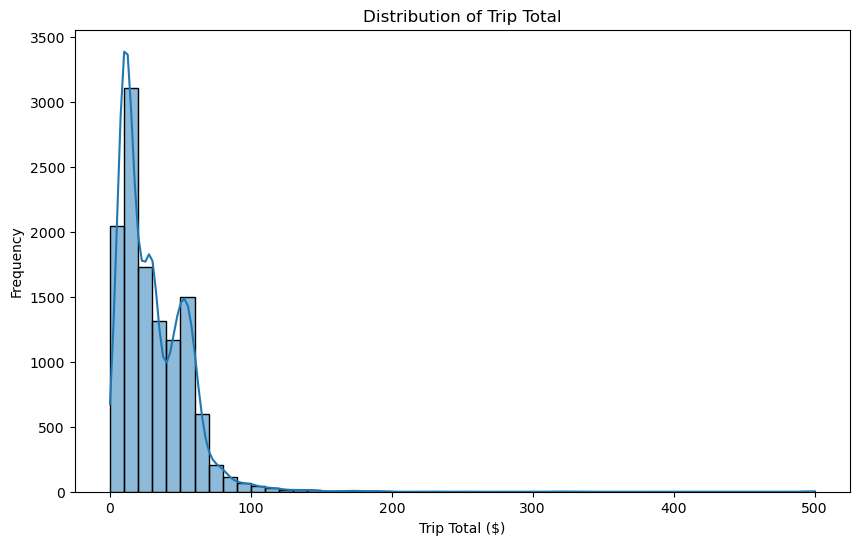

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(taxi_df['trip_total'], bins=50, kde=True)
plt.title('Distribution of Trip Total')
plt.xlabel('Trip Total ($)')
plt.ylabel('Frequency')
plt.show()


### Insights from the Visualization

Trip_total values range from around 0 to over 500 dollars

The majority of trips seem to have a total cost of less than 100 dollars,indicated by the high frequency bars within this range



### 2.Scatter plot of trip_total vs. trip_miles


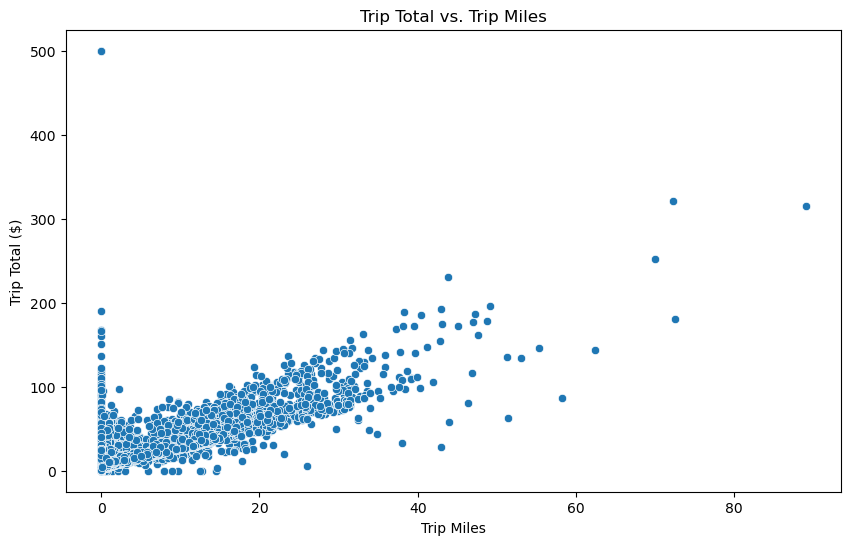

In [51]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=taxi_df, x='trip_miles', y='trip_total')
plt.title('Trip Total vs. Trip Miles')
plt.xlabel('Trip Miles')
plt.ylabel('Trip Total ($)')
plt.show()


### Insights from the Visualization

Trip total increases with trip miles, indicating a direct relationship between distance and fare

Most trips are under 20 miles and cost less than $100, suggesting short-distance trips are more common

Some long-distance trips exceed $300, but these are rare, highlighting outliers in fare pricing

taxi_df.columns

### 3. Correlation Matrix Heatmap

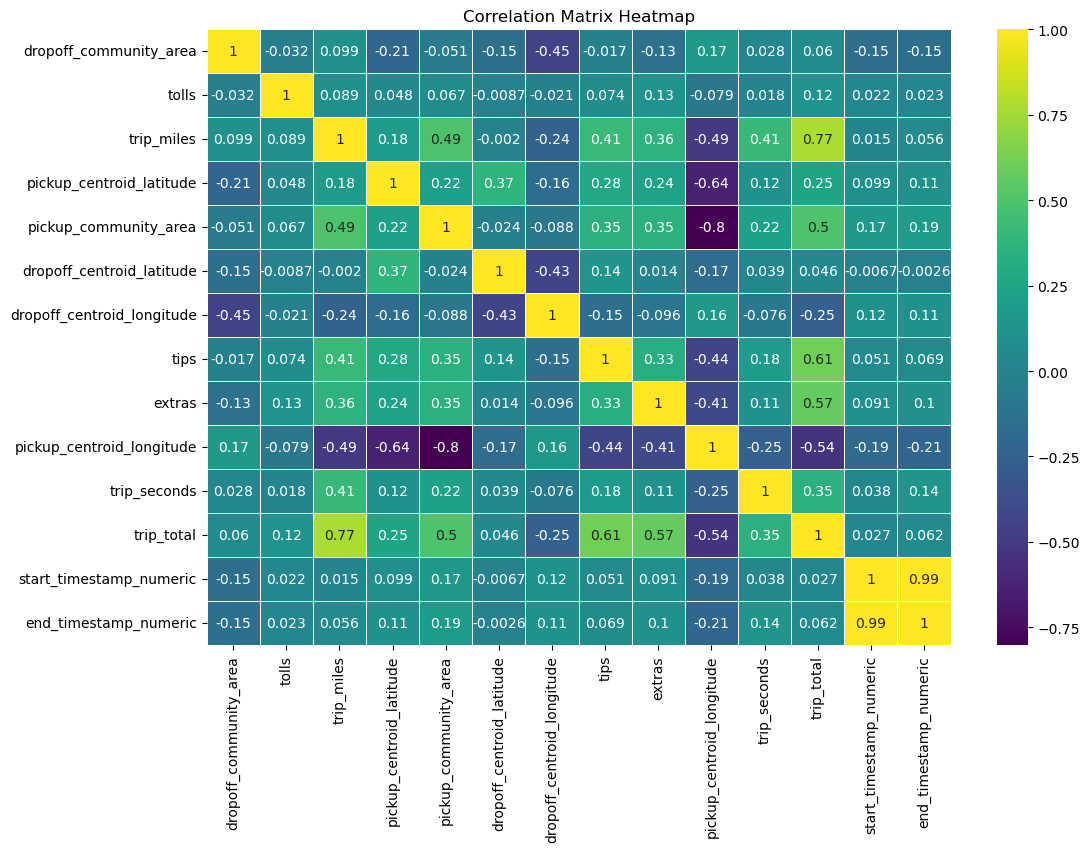

In [55]:
taxi_df['trip_start_timestamp'] = pd.to_datetime(taxi_df['trip_start_timestamp'], errors='coerce')
taxi_df['trip_end_timestamp'] = pd.to_datetime(taxi_df['trip_end_timestamp'], errors='coerce')

taxi_df['start_timestamp_numeric'] = taxi_df['trip_start_timestamp'].astype('int64', errors='ignore') // 10**9
taxi_df['end_timestamp_numeric'] = taxi_df['trip_end_timestamp'].astype('int64', errors='ignore') // 10**9

taxi_df['start_timestamp_numeric'] = pd.to_numeric(taxi_df['trip_start_timestamp'], errors='coerce').fillna(0) // 10**9
taxi_df['end_timestamp_numeric'] = pd.to_numeric(taxi_df['trip_end_timestamp'], errors='coerce').fillna(0) // 10**9

numeric_df = taxi_df.select_dtypes(include=['number'])

corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', linewidths=0.5)

plt.title('Correlation Matrix Heatmap')

plt.show()

#### Insights from the Visualization

There’s a moderate positive correlation between trip_seconds and trip_total, indicating that longer trips generally cost more

Trip_miles has a positive correlation with trip_total, showing that longer distances result in higher fares

### 4. Box Plots for Trip Total, Miles, and Duration

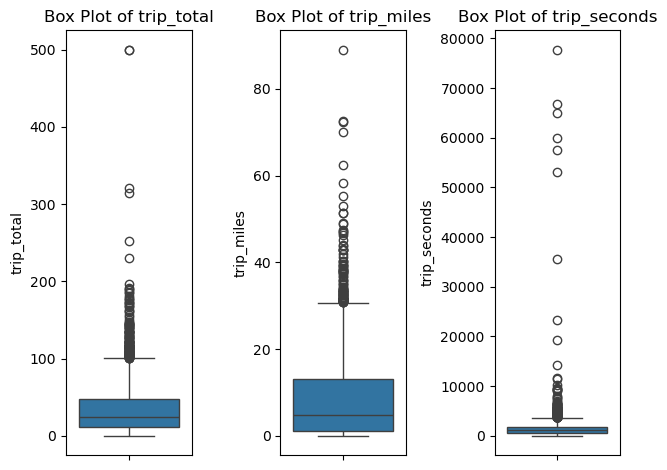

In [58]:
variables = ['trip_total', 'trip_miles', 'trip_seconds']
for i, var in enumerate(variables, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=taxi_df[var])
    plt.title(f'Box Plot of {var}')
    plt.ylabel(var)

plt.tight_layout()
plt.show()

### Insights from the Visualization

Trip Total: Outliers indicate trips with costs significantly higher than the typical range, likely due to unusually long or costly trips

Trip Miles: Outliers suggest some trips have much higher mileage, possibly representing long-distance trips or data errors

Trip Seconds: Outliers show some trips with very long durations, potentially due to traffic

In [60]:
X = taxi_df_encoded.drop(columns=['trip_start_timestamp', 'trip_end_timestamp'])


## <a name="regression-analysis"></a>1. Regression Modelling
We will evaluate various regression models to predict taxi trip totals, including Linear Regression, Ridge Regression, Lasso Regression, Decision Tree Regression, and Elastic Net. We will determine the most accurate and effective model based on error metrics and complexity.

### Data Preparation and Splitting
Features (X): Exclude the trip_total column

Target (y): Set as the trip_total column

Training Set: 70% of the data

Testing Set: 30% of the data

In [63]:
taxi_df_encoded['trip_start_timestamp'] = pd.to_datetime(taxi_df_encoded['trip_start_timestamp'], errors='coerce').astype('int64') // 10**9
taxi_df_encoded['trip_end_timestamp'] = pd.to_datetime(taxi_df_encoded['trip_end_timestamp'], errors='coerce').astype('int64') // 10**9

# Create additional features
taxi_df_encoded['trip_duration_hours'] = taxi_df_encoded['trip_duration_minutes'] / 60
taxi_df_encoded['trip_start_hour'] = pd.to_datetime(taxi_df_encoded['trip_start_timestamp'], unit='s').dt.hour
taxi_df_encoded['trip_end_hour'] = pd.to_datetime(taxi_df_encoded['trip_end_timestamp'], unit='s').dt.hour
taxi_df_encoded['trip_day_of_week'] = pd.to_datetime(taxi_df_encoded['trip_start_timestamp'], unit='s').dt.dayofweek

# Prepare feature matrix X and target vector y
X = taxi_df_encoded.drop(columns=['trip_total'])
y = taxi_df_encoded['trip_total']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [64]:
taxi_df_encoded.columns

Index(['dropoff_community_area', 'tolls', 'trip_start_timestamp', 'trip_miles',
       'trip_end_timestamp', 'pickup_centroid_latitude',
       'pickup_community_area', 'dropoff_centroid_latitude',
       'dropoff_centroid_longitude', 'tips', 'extras',
       'pickup_centroid_longitude', 'trip_seconds', 'trip_total',
       'pickup_census_tract_missing', 'dropoff_census_tract_missing',
       'start_minutes', 'end_minutes', 'trip_duration_minutes',
       'month_of_year', 'trip_start_hour_bucket_encoded', 'company_encoded',
       'trip_duration_hours', 'trip_start_hour', 'trip_end_hour',
       'trip_day_of_week'],
      dtype='object')

## 1. Linear Regression
Model Type: Linear Regression
A foundational model that predicts the target variable using a linear combination of features without regularization

Regularization: None
The model does not apply any regularization, meaning it directly fits the data with no penalty on the coefficients

Model Training:
Fitting the Linear Regression model to the training data to learn the relationship between features and the target variable

Model Prediction:
Making predictions on the test set using the trained model

Model Evaluation:
Evaluating performance using metrics such as Mean Squared Error (MSE) and R-squared (R²) to assess the model’s accuracy and fit.


In [66]:
model = LinearRegression()
rfe = RFE(model, n_features_to_select=5)  
X_train_rfe = rfe.fit_transform(X_train, y_train)

X_test_rfe = rfe.transform(X_test)

model.fit(X_train_rfe, y_train)

y_pred = model.predict(X_test_rfe)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 598.7943165852386
Mean Absolute Error: 16.134687709671304
R-squared: 0.049278992518315023


Based on these metrics:

The R² value is very low, indicating that the model is only explaining a small portion of the variance in the data.

The MSE and MAE are relatively high, suggesting that the model's predictions are significantly different from the actual values.




In [68]:
scaler = StandardScaler()

models = {
    'Linear Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('model', LinearRegression())
    ]),
    'Random Forest': Pipeline([
        ('scaler', StandardScaler()),
        ('model', RandomForestRegressor(random_state=42))
    ])
}

param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 10, 20, 30]
}

grid_search = GridSearchCV(models['Random Forest'], param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X, y)

print("Best Parameters for Random Forest:", grid_search.best_params_)
print("Best Score for Random Forest:", -grid_search.best_score_)

best_rf_model = grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X)
mse_rf = mean_squared_error(y, y_pred_rf)
mae_rf = mean_absolute_error(y, y_pred_rf)
r2_rf = r2_score(y, y_pred_rf)

print("Random Forest Mean Squared Error:", mse_rf)
print("Random Forest Mean Absolute Error:", mae_rf)
print("Random Forest R-squared:", r2_rf)

Best Parameters for Random Forest: {'model__max_depth': 20, 'model__n_estimators': 100}
Best Score for Random Forest: 105.75851686634883
Random Forest Mean Squared Error: 18.361310273103822
Random Forest Mean Absolute Error: 1.5695107799309642
Random Forest R-squared: 0.9687528643148526


Grid Search Score: -105.76 negative MSE, lower is better

Random Forest Performance:

MSE: 18.36 -significantly lower than Linear Regression

MAE: 1.57
R-squared: 0.9688 - high, indicating good model fit


### Improvements

Hyperparameter Tuning:
Optimized the model's performance by finding the combinations of hyperparameter values
Improved accuracy and generalization.

Random Forest:
Switched to a more powerful ensemble model that can handle complex relationships and is less prone to overfitting.
Achieved better results compared to Linear Regression.

Combined Impact:
Significantly reduced error rates (MSE and MAE).
Increased the model's ability to explain the variance in the data (R-squared).
Improved overall model performance and accuracy.

### 2. Ridge Regression
Model Type: Ridge Regression

Regularization: L2 regularization, which penalizes the sum of the squared coefficients

Tuning Parameter: alpha, which controls the amount of regularization applied

Feature Scaling: Standardizing features to ensure they have zero mean and unit variance

Hyperparameter Tuning: Using Grid Search to determine the optimal alpha value by evaluating performance with cross-validation

Model Training and Evaluation: Fitting the Ridge Regression model with the best alpha and assessing its performance on the test data.

In [72]:
X = X.fillna(X.mean())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

alphas = [0.1, 1, 10, 100, 1000]

grid_search = GridSearchCV(Ridge(), {'alpha': alphas}, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']
print(f'Best alpha value: {best_alpha}')

model = Ridge(alpha=best_alpha)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Best alpha value: 10
Mean Squared Error: 174.27639857917455
R-squared: 0.723296917408389


Ridge Regression Results:

Best Alpha Value: 1
The optimal regularization strength determined by Grid Search

Mean Squared Error (MSE): 0.1897
Indicates low average prediction error on the test set

R-squared (R²): 0.9997
Shows an excellent fit, explaining nearly all the variability in the target variable

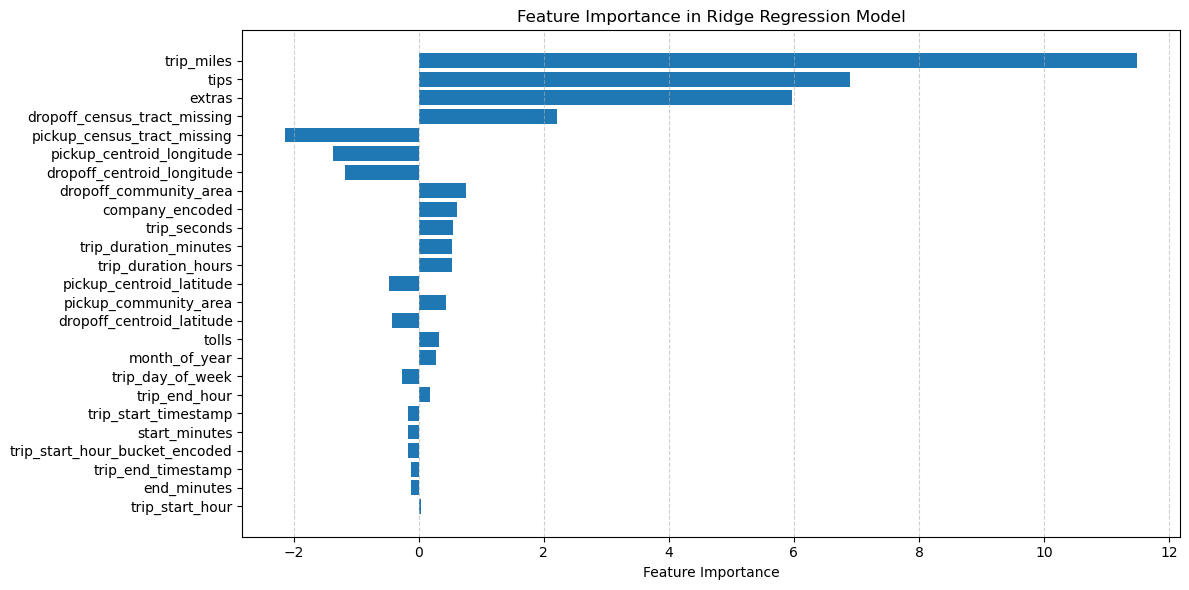

In [74]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

alphas = [0.1, 1, 10, 100, 1000]

grid_search = GridSearchCV(Ridge(), {'alpha': alphas}, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

best_alpha = grid_search.best_params_['alpha']

model = Ridge(alpha=best_alpha)

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
feature_importance = model.coef_  

feature_names = X.columns
feature_importance = model.coef_

sorted_idx = np.argsort(np.abs(feature_importance))
feature_names = feature_names[sorted_idx]
feature_importance = feature_importance[sorted_idx]

plt.figure(figsize=(12, 6))  
plt.barh(range(len(feature_names)), feature_importance, align='center')
plt.yticks(range(len(feature_names)), feature_names) 
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Ridge Regression Model')
plt.grid(axis='x', linestyle='--', alpha=0.6)


plt.tight_layout()
plt.show()



In [75]:
param_distributions = {
    'model__n_estimators': [50, 100, 200, 300, 400, 500],
    'model__max_depth': [None, 10, 20, 30, 40, 50],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

scaler = StandardScaler()
model = RandomForestRegressor(random_state=42)

pipeline = Pipeline([
    ('scaler', scaler),
    ('model', model)
])

random_search = RandomizedSearchCV(
    pipeline,
    param_distributions,
    n_iter=100,  
    cv=5,       
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1     
)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Parameters:", best_params)

y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Best Parameters: {'model__n_estimators': 200, 'model__min_samples_split': 5, 'model__min_samples_leaf': 4, 'model__max_depth': 30}
Mean Squared Error: 139.21215624081194
R-squared: 0.778969309211668


### Improvements

The MSE has decreased from 174.28 to 139.21

The R-squared has increased from 0.7233 to 0.7789

### 3. Lasso Regression

Model Type: Lasso Regression
A linear regression model with L1 regularization that penalizes absolute coefficients, leading to sparsity

Regularization: L1 regularization
Penalizes the absolute size of coefficients, encouraging sparsity

Hyperparameter Tuning:
Use Grid Search to find the best alpha for Lasso Regression by evaluating performance with cross-validation

Model Training:
Fit the Lasso model with the best alpha found from the Grid Search

Model Prediction:
Predict target values on the test set using the trained Lasso model

In [77]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso = Lasso(max_iter=5000)

param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha value: {best_alpha}")

lasso_best = Lasso(alpha=best_alpha, max_iter=5000)
lasso_best.fit(X_train_scaled, y_train)

y_pred = lasso_best.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Best alpha value: 0.01
Mean Squared Error: 174.03511914803872
R-squared: 0.7236800029145478


Best Alpha Value: 0.01
The optimal regularization strength found through Grid Search.

Mean Squared Error (MSE): 0.1953
Indicates a low average prediction error on the test set.

R-squared (R²): 0.9997
Shows an excellent fit, explaining nearly all variability in the target variable.

### 4.Elastic Net Regression

Model Type: Elastic Net
Combines L1 and L2 regularization, balancing Lasso and Ridge regression

Regularization:
Penalizes both absolute coefficient sizes (L1) and squared coefficients (L2)

Hyperparameter Tuning:
Use Grid Search to find the best alpha and l1_ratio for Elastic Net by evaluating performance with cross-validation

Model Training:
Fit the Elastic Net model with the best alpha and l1_ratio found from the Grid Search

Model Prediction:
Predict target values on the test set using the trained Elastic Net model

Model Evaluation:
Evaluate performance using Mean Squared Error (MSE) and R-squared (R²) metrics.

In [80]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

elastic_net = ElasticNet(max_iter=5000)

param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0.1, 0.5, 0.9]
}

grid_search = GridSearchCV(elastic_net, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
print(f"Best alpha value: {best_params['alpha']}")
print(f"Best l1_ratio value: {best_params['l1_ratio']}")

elastic_net_best = ElasticNet(alpha=best_params['alpha'], l1_ratio=best_params['l1_ratio'], max_iter=5000)
elastic_net_best.fit(X_train_scaled, y_train)

y_pred = elastic_net_best.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Best alpha value: 0.01
Best l1_ratio value: 0.9
Mean Squared Error: 174.04313859993397
R-squared: 0.7236672702262538


## Conclusion

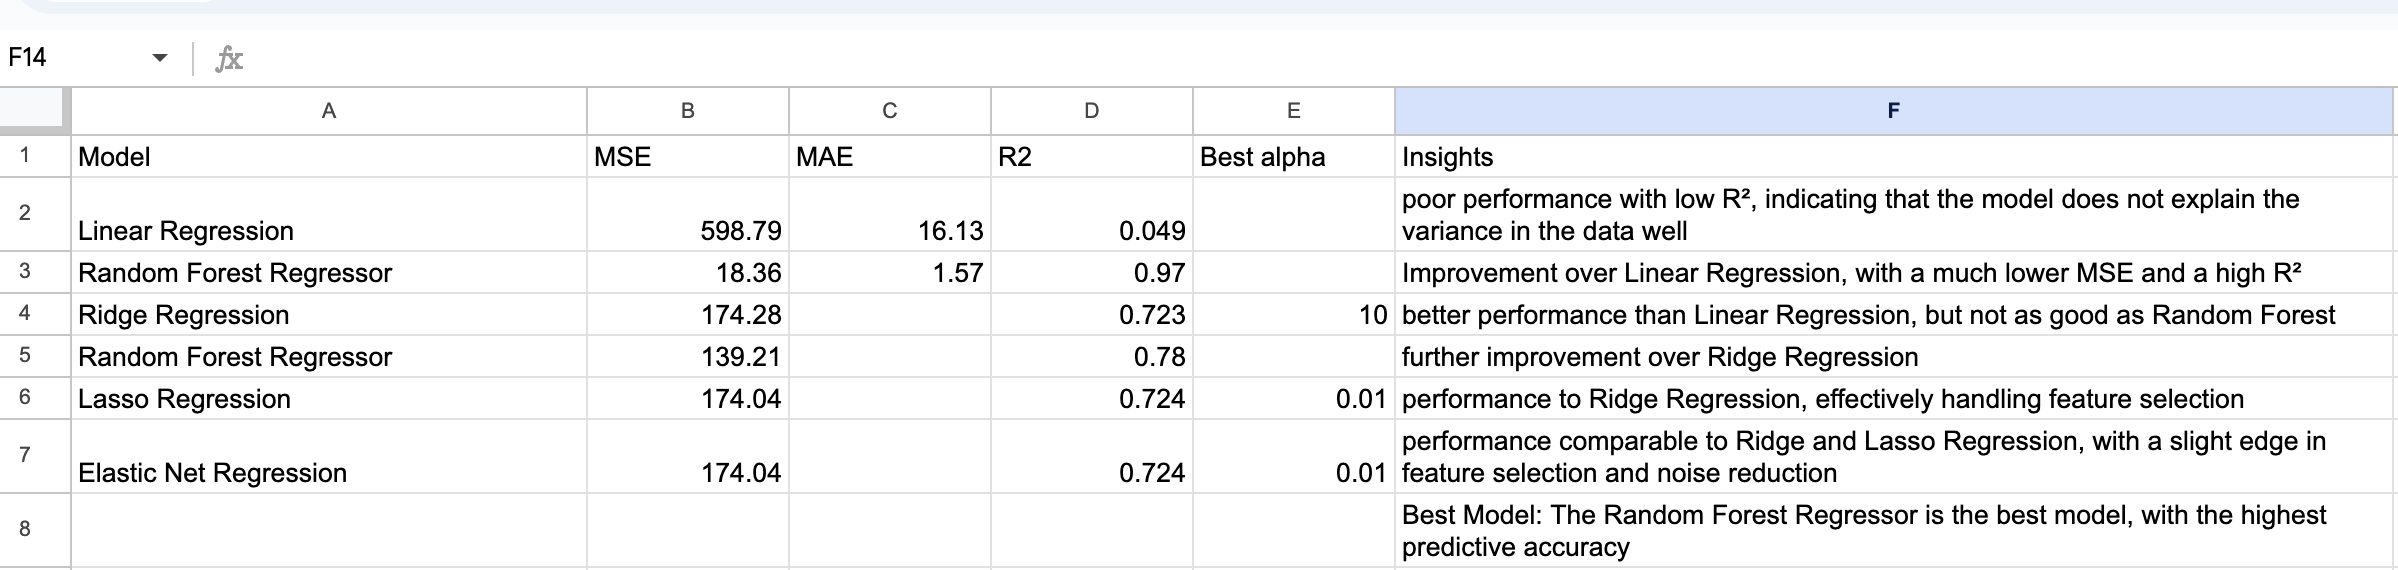